In [ ]:
#pip install pandas-datareader

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False    # 마이너스 기호 깨짐현상 해결
%matplotlib inline

# 1. 데이터 불러오기 (현대건설 주식을 대상으로 함)

In [ ]:
# 회사명을 통해 주식 종목코드 가져오는 함수 생성

def get_code(df, name):
    code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
    code = code.strip()    # 공백 제거해주기
    return code

code_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]
code_df = code_df[['회사명', '종목코드']]    # '회사명'과 '종목코드' 열만 가지고 옴
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})    ## 컬럼명 영어로 바꾸기
#print(code_df)
code_df.code = code_df.code.map('{:06d}'.format)    # 종목코드를 6자리 숫자 형식으로 맞춰줌
#print(code_df)
code = get_code(code_df, '현대건설')    # 현대건설 코드 가져오기
code = code + '.KS'    # 코스피의 경우 .KS로 끝남
print(code)

000720.KS


In [ ]:
start = datetime(2018, 1, 1)
end = datetime(2019, 12, 31)    # 기간을 2년으로 정함

hyundai = pdr.get_data_yahoo(code, start, end)   # 현대건설
hyundai

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,37000.0,36200.0,36650.0,36300.0,482518.0,35442.535156
2018-01-04,38400.0,36300.0,36300.0,37950.0,1459930.0,37053.558594
2018-01-05,38600.0,37300.0,38200.0,38050.0,655891.0,37151.195312
2018-01-08,38550.0,37400.0,38000.0,38350.0,577188.0,37444.109375
2018-01-09,38550.0,38000.0,38000.0,38400.0,511510.0,37492.929688
...,...,...,...,...,...,...
2019-12-23,42800.0,42350.0,42800.0,42550.0,276049.0,41951.406250
2019-12-24,42850.0,42300.0,42550.0,42450.0,261964.0,41852.812500
2019-12-26,42750.0,42300.0,42450.0,42650.0,334523.0,42050.000000


In [ ]:
kospi = pdr.get_data_yahoo('^KS11', start, end)    # KOSPI Index
kospi

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,2493.399902,2481.909912,2484.629883,2486.350098,331100.0,2486.350098
2018-01-04,2502.500000,2466.449951,2502.500000,2466.459961,333800.0,2466.459961
2018-01-05,2497.520020,2475.510010,2476.850098,2497.520020,308800.0,2497.520020
2018-01-08,2515.370117,2494.179932,2510.699951,2513.280029,311400.0,2513.280029
2018-01-09,2524.729980,2498.409912,2510.729980,2510.229980,374300.0,2510.229980
...,...,...,...,...,...,...
2019-12-23,2209.199951,2196.429932,2208.219971,2203.709961,502000.0,2203.709961
2019-12-24,2206.229980,2187.580078,2206.229980,2190.080078,570000.0,2190.080078
2019-12-26,2198.010010,2183.899902,2192.219971,2197.929932,571300.0,2197.929932


# 2. 수익률 계산

수익률은 시계열의 특징과 복리효과를 반영하고, 계산이 편리한 log 수익률을 사용하였다.

In [ ]:
# 현대건설 수익률
hyundai_df = pd.DataFrame(hyundai['Adj Close'])   # 수익률 계산을 위해 현대건설 수정종가(단위:원) 데이터 추출 
hyundai_df['현대건설'] = np.log(hyundai['Adj Close']/hyundai['Adj Close'].shift(1))
                         # 복리효과와 시계열 데이터의 특징을 고려해 log 수익률을 사용함

# 코스피 수익률
kospi_df = pd.DataFrame(kospi['Adj Close'])    # 수익률 계산을 위해 코스피 수정종가(단위:지수) 데이터 추출 
kospi_df['KOSPI'] = np.log(kospi['Adj Close']/kospi['Adj Close'].shift(1))

# 현대건설과 KOSPI 로그수익률 데이터프레임 병합
result = pd. concat([hyundai_df, kospi_df], axis=1, sort=False)

In [ ]:
Final = result[['현대건설','KOSPI']]
Final.dropna()   # 첫 시작일인 1월 3일의 경우 전일 종가가 없기 때문에 Nan으로 표시되어 이를 지움

,현대건설,KOSPI
Date,,
2018-01-04,0.044452,-0.008032
2018-01-05,0.002632,0.012514
2018-01-08,0.007853,0.006290
2018-01-09,0.001303,-0.001214
2018-01-10,0.052009,-0.004184
...,...,...
2019-12-23,-0.003519,-0.000213
2019-12-24,-0.002353,-0.006204
2019-12-26,0.004700,0.003578


In [ ]:
Final.describe()

,현대건설,KOSPI
count,486.000000,486.000000
mean,0.000364,-0.000254
std,0.032417,0.008586
min,-0.111408,-0.045411
25%,-0.015981,-0.004354
50%,-0.001097,0.000452
75%,0.013762,0.005003
max,0.261480,0.034728


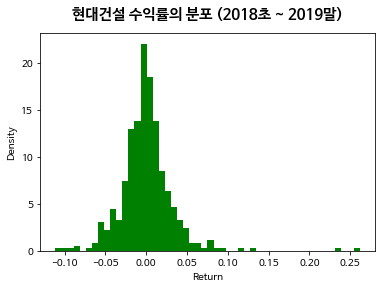

In [ ]:
# 현대건설 수익률의 분포

plt.title('현대건설 수익률의 분포 (2018초 ~ 2019말)',
          fontdict={'fontsize':15, 'fontweight':'bold'}, pad=15)
plt.hist(Final['현대건설'], color='green', bins=50, density=True)
plt.xlabel('Return'); plt.ylabel('Density')
plt.show()

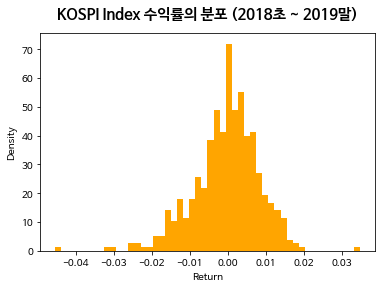

In [ ]:
# KOSPI Index 수익률의 분포

plt.title('KOSPI Index 수익률의 분포 (2018초 ~ 2019말)',
          fontdict={'fontsize':15, 'fontweight':'bold'}, pad=15)
plt.hist(Final['KOSPI'], color='orange', bins=50, density=True)
plt.xlabel('Return'); plt.ylabel('Density')
plt.show()

# 3. 계산된 수익률을 이용해 복원추출하기

In [ ]:
# n을 252로 정한 이유는 보통 주식의 일단위 수익률을 연단위 수익률로 환산할 때 252일을 기준으로 하기 때문이다,

# 복원추출
sample = Final.sample(n=252, replace=True, random_state=156)
sample 

,현대건설,KOSPI
Date,,
2018-03-09,0.078800,0.010780
2018-11-05,-0.012220,-0.009145
2019-09-19,-0.020075,0.004635
2019-12-27,0.009468,0.002853
2018-04-05,0.022262,0.012160
...,...,...
2018-11-27,0.032230,0.007842
2019-06-20,-0.012579,0.003059
2018-10-02,0.000000,-0.012611


In [ ]:
sample.describe()

,현대건설,KOSPI
count,252.000000,252.000000
mean,0.000407,0.000314
std,0.035066,0.008934
min,-0.111408,-0.030916
25%,-0.015916,-0.004101
50%,0.000000,0.000854
75%,0.013712,0.005943
max,0.232622,0.034728


In [ ]:
# 복원추출 결과의 합 (연 단위 수익률, 현대건설), (연 단위 수익률, KOSPI Index)

print('현대건설의 복원추출 결과 합: ', sample['현대건설'].sum()) 
print('코스피의 복원추출 결과 합: ', sample['KOSPI'].sum())

현대건설의 복원추출 결과 합:  0.1025697414704943
코스피의 복원추출 결과 합:  0.07920593944401025


# 4. Bootstrapping 시작 후, 1년 후의 수익률 계산해보기

In [ ]:
# 표본 수가 252인 수익률의 합(연 단위 수익률)을 구하는 것을 10000번 반복함

bootstrap= pd.DataFrame(Final.sample(252, replace=True).sum() for i in range(10000)) 
bootstrap

,현대건설,KOSPI
0,-0.689305,-0.145245
1,0.097850,-0.129347
2,-0.346860,-0.044572
3,-0.057612,0.006099
4,-0.057450,-0.014192
...,...,...
9995,0.044802,0.058227
9996,-0.587269,-0.100427
9997,0.225494,-0.230081
9998,-0.563713,-0.135302


In [ ]:
bootstrap.describe()

,현대건설,KOSPI
count,10000.000000,10000.000000
mean,0.094692,-0.065427
std,0.511212,0.136888
min,-1.540316,-0.659513
25%,-0.255531,-0.157466
50%,0.090747,-0.062437
75%,0.433624,0.027794
max,2.175338,0.421281


Text(0, 0.5, 'Density')

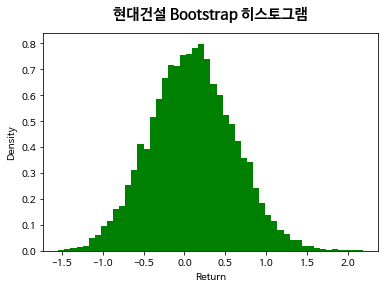

In [ ]:
# 현대건설 bootstrap 히스토그램 

plt.title('현대건설 Bootstrap 히스토그램',
          fontdict={'fontsize':15, 'fontweight':'bold'}, pad=15)
plt.hist(bootstrap['현대건설'], color='green', bins=50, density=True)
plt.xlabel('Return'); plt.ylabel('Density')

Text(0, 0.5, 'Density')

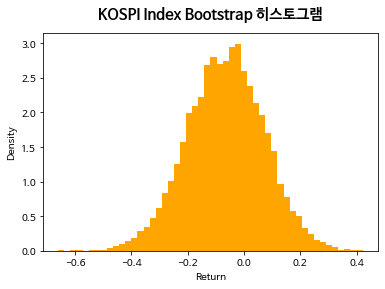

In [ ]:
# KOSPI bootstrap 히스토그램

plt.title('KOSPI Index Bootstrap 히스토그램',
          fontdict={'fontsize':15, 'fontweight':'bold'}, pad=15)
plt.hist(bootstrap['KOSPI'], color='orange', bins=50, density=True)
plt.xlabel('Return'); plt.ylabel('Density')

In [ ]:
bootstrap.mean()    # 부트스트래핑 후 수익률의 평균

현대건설     0.094692
KOSPI   -0.065427
dtype: float64

In [ ]:
conclusion = bootstrap['현대건설'].mean() * 100
print(conclusion)

9.469176175357335


# 결론
부트스트래핑의 의미:
전통적인 모델의 피팅은 여러가지 가정을 필요로 한다. 하지만, 실제 주식시장의 수익률은 한 번 오를때 연달아서 오르고 떨어질 때 떨어지는 등 자기상관성을 띄고 있어 예측의 문제에 있어서 한계점이 있다.
그에 반해, 부트스트래핑은 분포의 가정이 필요하지 않고, 표본의 개수를 늘려 정규분포에 근사하게 되어, 우수한 추정을 제공해주기 때문에 예측의 문제에 있어서 더 우수한 능력을 보여줄 수 있다.
하지만, 부트스트래핑은 기본적으로 iid를 가정한 모델이라는 점에서 여전히 한계점이 있다고 할 수 있으며, 효율적 시장가설이 성립될 때와 같은 제한적인 상황에서 이론적으로 지지받을 수 있다.

경험적 히스토그램의 의미:

2년치 데이터에서는 둘 다 outlier값이 나오며, 꼬리가 긴 히스토그램을 보여주고 있다. 그에 반해 부트스트래핑을 거친 분포는 정규분포와 유사하게 그려져 CLT가 적용 가능해 보인다.

지난 2년치 데이터를 보았을 때, 코스피와 현대건설의 히스토그램은 달라 보인다. 그 이유는 코스피는 체계적인 위험만 수익률에 반영되지만, 현대건설은 개별 주식으로 수익률에 비체계적 위험이 추가적으로 반영되어 변동성이 더 높을 수밖에 없기 때문이다.

부트스트래핑 결과 도출한 히스토그램 분포는 자산 투자를 위한 risk taking의 정도를 결정하는데 도움이 될 수 있다.

In [ ]:
print("현대건설의 부트스트래핑 1년 후의 수익률은 약 %.2f%%에 가까워질 것으로 보인다." % conclusion)

현대건설의 부트스트래핑 1년 후의 수익률은 약 9.47%에 가까워질 것으로 보인다.


[참고문헌] Ruiz & Rascual(2002), 「Bootstrapping Financial Time Series」